# Exercise 2 - IRIS Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Iris.csv')

# Q1

### META  INFORMATION
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.
It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Q2

<BarContainer object of 150 artists>

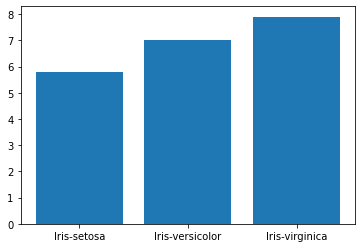

In [6]:
plt.bar(data['Species'],data['SepalLengthCm'])

<BarContainer object of 150 artists>

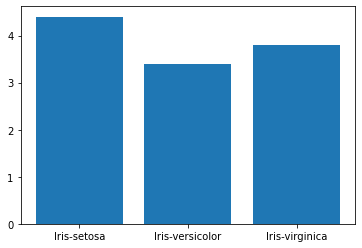

In [7]:
plt.bar(data['Species'],data['SepalWidthCm'])

<BarContainer object of 150 artists>

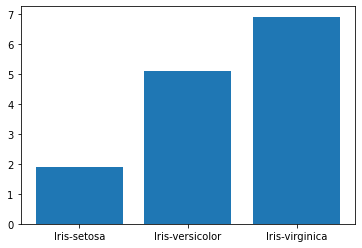

In [8]:
plt.bar(data['Species'],data['PetalLengthCm'])

<BarContainer object of 150 artists>

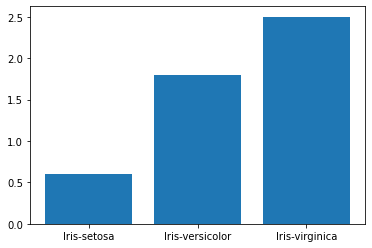

In [9]:
plt.bar(data['Species'],data['PetalWidthCm'])

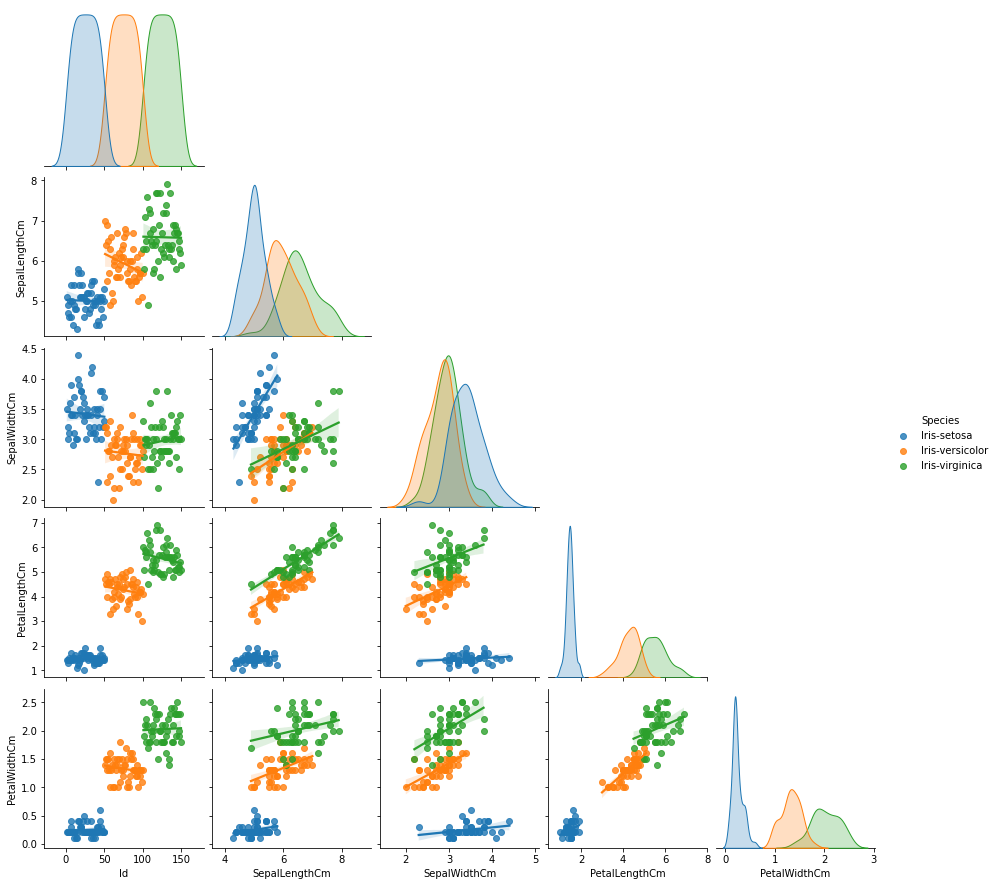

In [10]:
sns.pairplot(data, hue="Species", corner=True, kind='reg')

## Q3

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
y = np.ravel(y)

In [13]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [15]:
regressor = LogisticRegression(max_iter = 1000)

In [16]:
regressor.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred=regressor.predict(X_test)

In [18]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

# Q4

In [19]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [20]:
classification_report(y_test,y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        19\nIris-versicolor       1.00      1.00      1.00        13\n Iris-virginica       1.00      1.00      1.00        13\n\n       accuracy                           1.00        45\n      macro avg       1.00      1.00      1.00        45\n   weighted avg       1.00      1.00      1.00        45\n'

In [21]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

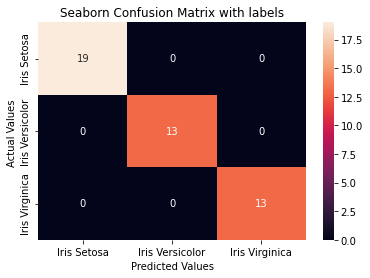

In [22]:
ax = sns.heatmap(confusion_matrix, annot=True)

ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Iris Setosa','Iris Versicolor', 'Iris Virginica'])
ax.yaxis.set_ticklabels(['Iris Setosa','Iris Versicolor', 'Iris Virginica'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [23]:
accuracy_score(y_test, y_pred)

1.0

# Q5

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(2,21)
scores_train = []
scores_test= []
scores_list = []
training = []
test = []
error_rate = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    training_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    training.append(training_score)
    test.append(test_score)
    
    scores_train.append(training_score)
    scores_test.append(test_score)
    
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
                
scores_test


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [25]:
print("Accuracy for training set: " )
scores_train


Accuracy for training set: 


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9809523809523809,
 0.9904761904761905,
 0.9809523809523809,
 0.9904761904761905,
 0.9809523809523809,
 1.0,
 0.9809523809523809,
 0.9904761904761905,
 0.9714285714285714,
 0.9904761904761905,
 0.9714285714285714,
 0.9809523809523809,
 0.9714285714285714]

In [26]:
print("Accuracy for testing set: " )
scores_test

Accuracy for testing set: 


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'Testing Accuracy')

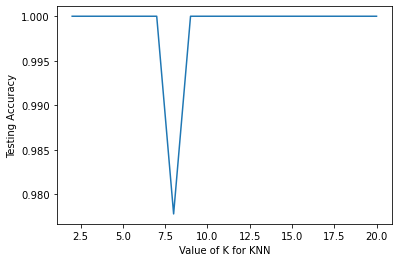

In [27]:
plt.plot(k_range, scores_test)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Error Rate')

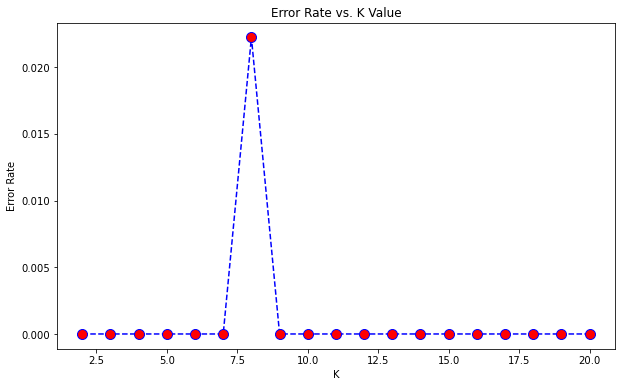

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(2,21),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
for n in range(3, 20, 2):
    knc = KNeighborsClassifier(n_neighbors = n)
    knc.fit(X_train,y_train)
    pred_y = knc.predict(X_test)
    score = knc.score(X_test,y_test)
    print("Score for", n, "neighbours =", score)

Score for 3 neighbours = 1.0
Score for 5 neighbours = 1.0
Score for 7 neighbours = 1.0
Score for 9 neighbours = 1.0
Score for 11 neighbours = 1.0
Score for 13 neighbours = 1.0
Score for 15 neighbours = 1.0
Score for 17 neighbours = 1.0
Score for 19 neighbours = 1.0


**bold text**# Q6

### The optimal value of K
There is a 100% accuracy score for values of K between 1 to 7 and 9-20. Ideally, the optimal value of K is found to be square root of N (no of samples), so we can go ahead with K = 12

In [30]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X,y)
y_pred = knn.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [31]:
accuracy_score(y_test, y_pred)

1.0

# Q7

Since the dataset is quite small, therefore both logistic regression and KNN work with 100% accuracy